In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

2024-05-09 14:05:44.709622: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 14:05:44.709775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 14:05:44.836546: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load the DataFrame from the CSV file and images 
df = pd.read_csv('/kaggle/input/memotion-dataset/Memotion 3/updated_train.csv')
img_folder = '/kaggle/input/memotion-dataset/Memotion 3/trainImages'
target_shape = (224, 224)
images = []

df['humour'] = df['humour'].replace({'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious' : 1})
df['sarcastic'] = df['sarcastic'].replace({'not_sarcastic': 0, 'twisted_meaning': 1, 'general' : 1, 'little_sarcastic' : 1, 'very_sarcastic' : 1, 'very_twisted' : 1})
df['offensive'] = df['offensive'].replace({'not_offensive': 0, 'offensive': 1, 'slight' : 1, 'very_offensive' : 1, 'hateful_offensive': 1})
df['motivational'] = df['motivational'].replace({'not_motivational': 0, 'motivational': 1})

# Combine the columns into a new DataFrame
Y_train = pd.concat([df['humour'], df['sarcastic'], df['offensive'], df['motivational']], axis=1)

#iterating over the dataframe if ocr is null drop the frame
for index,row in df.iterrows():
    img_path = os.path.join(img_folder, str(row['image_id'])+'.jpg')
    image = Image.open(img_path)
    image = image.resize(target_shape)
    images.append(image)
    
# Convert the resulting Series to a NumPy array
Y_train = np.array(Y_train, dtype=np.int32)
X_train = np.array(images)

/tmp/ipykernel_34/1693201200.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['humour'] = df['humour'].replace({'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious' : 1})
/tmp/ipykernel_34/1693201200.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sarcastic'] = df['sarcastic'].replace({'not_sarcastic': 0, 'twisted_meaning': 1, 'general' : 1, 'little_sarcastic' : 1, 'very_sarcastic' : 1, 'very_twisted' : 1})
/tmp/ipykernel_34/1693201200.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will 

In [3]:
Y_train[:5]

array([[1, 1, 0, 0],
       [1, 1, 1, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0]], dtype=int32)

In [4]:
#reading the validation data
df = pd.read_csv('/kaggle/input/memotion-dataset/Memotion 3/updated_val.csv')
img_folder = '/kaggle/input/memotion-dataset/Memotion 3/valImages'
images=[]

df['humour'] = df['humour'].replace({'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious' : 1})
df['sarcastic'] = df['sarcastic'].replace({'not_sarcastic': 0, 'twisted_meaning': 1, 'general' : 1, 'little_sarcastic' : 1, 'very_sarcastic' : 1, 'very_twisted' : 1})
df['offensive'] = df['offensive'].replace({'not_offensive': 0, 'offensive': 1, 'slight' : 1, 'very_offensive' : 1, 'hateful_offensive': 1})
df['motivational'] = df['motivational'].replace({'not_motivational': 0, 'motivational': 1})

# Combine the columns into a new DataFrame
Y_val = pd.concat([df['humour'], df['sarcastic'], df['offensive'], df['motivational']], axis=1)

#iterating over the dataframe if ocr is null drop the frame
for index,row in df.iterrows():
    img_path = os.path.join(img_folder, str(row['image_id'])+'.jpg')
    image = Image.open(img_path)
    image = image.resize(target_shape)
    images.append(image)
    
# Convert the resulting Series to a NumPy array
Y_val = np.array(Y_val, dtype=np.int32)
X_val = np.array(images)

/tmp/ipykernel_34/2955532732.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['humour'] = df['humour'].replace({'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious' : 1})
/tmp/ipykernel_34/2955532732.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sarcastic'] = df['sarcastic'].replace({'not_sarcastic': 0, 'twisted_meaning': 1, 'general' : 1, 'little_sarcastic' : 1, 'very_sarcastic' : 1, 'very_twisted' : 1})
/tmp/ipykernel_34/2955532732.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will 

In [5]:
Y_val[:10]

array([[1, 1, 0, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 1, 0],
       [1, 0, 0, 0]], dtype=int32)

In [6]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='sigmoid')(x)  # Sigmoid activation for multi-label
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)

# Train the model
model.fit(X_train, Y_train, batch_size=16, epochs=70, validation_data = (X_val,Y_val))

Epoch 1/70
  2/438 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.2500 - loss: 4.9482   

I0000 00:00:1715264623.792155     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715264623.811877     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5576 - loss: 2.3208

W0000 00:00:1715264663.770588     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715264667.131384     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


438/438 ━━━━━━━━━━━━━━━━━━━━ 83s 147ms/step - accuracy: 0.5576 - loss: 2.3186 - val_accuracy: 0.6433 - val_loss: 0.4655
Epoch 2/70
  1/438 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - accuracy: 0.5625 - loss: 0.2939

W0000 00:00:1715264688.116211     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


438/438 ━━━━━━━━━━━━━━━━━━━━ 38s 86ms/step - accuracy: 0.6823 - loss: 0.2294 - val_accuracy: 0.6793 - val_loss: 0.5681
Epoch 3/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.6834 - loss: 0.1077 - val_accuracy: 0.6680 - val_loss: 0.5865
Epoch 4/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 38s 86ms/step - accuracy: 0.6791 - loss: 0.0666 - val_accuracy: 0.6200 - val_loss: 0.6033
Epoch 5/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.6560 - loss: 0.0667 - val_accuracy: 0.5893 - val_loss: 0.6814
Epoch 6/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.6844 - loss: 0.0733 - val_accuracy: 0.6747 - val_loss: 0.6488
Epoch 7/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 38s 86ms/step - accuracy: 0.6525 - loss: 0.0847 - val_accuracy: 0.6127 - val_loss: 0.8330
Epoch 8/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.6582 - loss: 0.0899 - val_accuracy: 0.5267 - val_loss: 0.7396
Epoch 9/70
438/438 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step - accuracy: 0.6165 - loss: 0.0921 - val_accurac

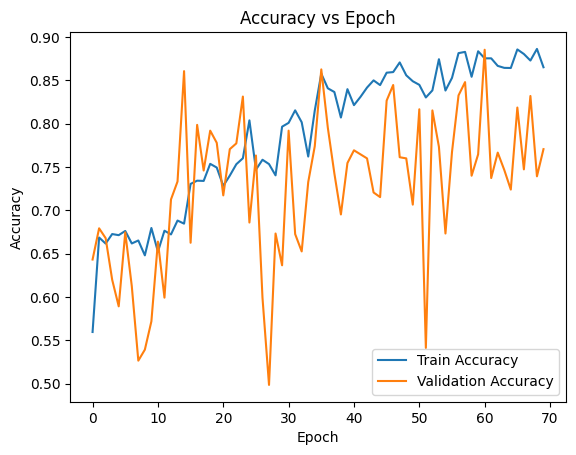

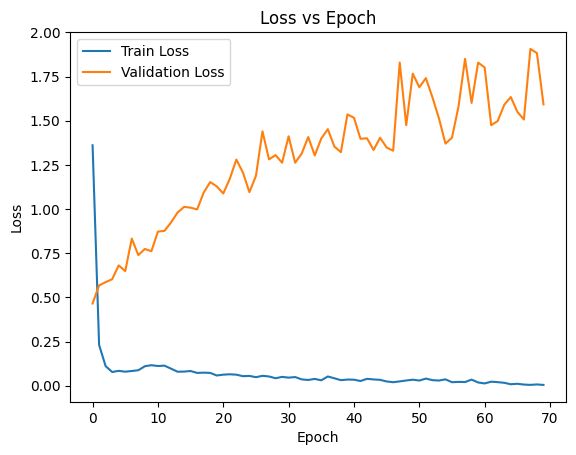

In [8]:
# Plot accuracy vs epoch
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss vs epoch
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
predicted = model.predict(X_val)

47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step


In [18]:
# Threshold value for considering a class as present
threshold = 0.5

# Convert predicted probabilities to binary array
predicted = (predicted > threshold).astype(int)

In [20]:
accuracy_arr = []
f1_arr = []
precision_arr = []
recall_arr = []

 # **Score of Humour Detection**

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Evaluate accuracy
humour_accuracy = accuracy_score(Y_val[:,0], predicted[:,0])

# Calculate F1 score
humour_f1 = f1_score(Y_val[:,0], predicted[:,0], average='weighted')

# Calculate precision
humour_precision = precision_score(Y_val[:,0], predicted[:,0], average='weighted')

# Calculate recall
humour_recall = recall_score(Y_val[:,0], predicted[:,0], average='weighted')

accuracy_arr.append(humour_accuracy)
f1_arr.append(humour_f1)
precision_arr.append(humour_precision)
recall_arr.append(humour_recall)

print("Score of Humour Detection")
print("Accuracy:", humour_accuracy)
print("F1 Score:", humour_f1)
print("Precision:", humour_precision)
print("Recall:", humour_recall)

Score of Humour Detection
Accuracy: 0.9226666666666666
F1 Score: 0.8996003144260016
Precision: 0.8819018574666626
Recall: 0.9226666666666666


# **Score of Sarcasm Detection**

In [22]:
# Evaluate accuracy
sarcasm_accuracy = accuracy_score(Y_val[:,1], predicted[:,1])

# Calculate F1 score
sarcasm_f1 = f1_score(Y_val[:,1], predicted[:,1], average='weighted')

# Calculate precision
sarcasm_precision = precision_score(Y_val[:,1], predicted[:,1], average='weighted')

# Calculate recall
sarcasm_recall = recall_score(Y_val[:,1], predicted[:,1], average='weighted')

accuracy_arr.append(sarcasm_accuracy)
f1_arr.append(sarcasm_f1)
precision_arr.append(sarcasm_precision)
recall_arr.append(sarcasm_recall)

print("Score of Sarcasm Detection")
print("Accuracy:", sarcasm_accuracy)
print("F1 Score:", sarcasm_f1)
print("Precision:", sarcasm_precision)
print("Recall:", sarcasm_recall)

Score of Sarcasm Detection
Accuracy: 0.8986666666666666
F1 Score: 0.872016105612913
Precision: 0.8498340321794248
Recall: 0.8986666666666666


# **Score of Offensive Detection**

In [23]:
# Evaluate accuracy
offensive_accuracy = accuracy_score(Y_val[:,2], predicted[:,2])

# Calculate F1 score
offensive_f1 = f1_score(Y_val[:,2], predicted[:,2], average='weighted')

# Calculate precision
offensive_precision = precision_score(Y_val[:,2], predicted[:,2], average='weighted')

# Calculate recall
offensive_recall = recall_score(Y_val[:,2], predicted[:,2], average='weighted')

accuracy_arr.append(offensive_accuracy)
f1_arr.append(offensive_f1)
precision_arr.append(offensive_precision)
recall_arr.append(offensive_recall)

print("Score of Offensive Detection")
print("Accuracy:", offensive_accuracy)
print("F1 Score:", offensive_f1)
print("Precision:", offensive_precision)
print("Recall:", offensive_recall)

Score of Offensive Detection
Accuracy: 0.4766666666666667
F1 Score: 0.43880677602116763
Precision: 0.5357954699121027
Recall: 0.4766666666666667


# **Score of Motivation Detection**

In [24]:
# Evaluate accuracy
motivation_accuracy = accuracy_score(Y_val[:,3], predicted[:,3])

# Calculate F1 score
motivation_f1 = f1_score(Y_val[:,3], predicted[:,3], average='weighted')

# Calculate precision
motivation_precision = precision_score(Y_val[:,3], predicted[:,3], average='weighted')

# Calculate recall
motivation_recall = recall_score(Y_val[:,3], predicted[:,3], average='weighted')

accuracy_arr.append(motivation_accuracy)
f1_arr.append(motivation_f1)
precision_arr.append(motivation_precision)
recall_arr.append(motivation_recall)

print("Score of Motivation Detection")
print("Accuracy:", motivation_accuracy)
print("F1 Score:", motivation_f1)
print("Precision:", motivation_precision)
print("Recall:", motivation_recall)

Score of Motivation Detection
Accuracy: 0.9506666666666667
F1 Score: 0.9475054119567043
Precision: 0.9443928859143583
Recall: 0.9506666666666667


# **Average scores**

In [25]:
accuracy_arr = np.array(accuracy_arr)
f1_arr = np.array(f1_arr)
precision_arr = np.array(precision_arr)
recall_arr = np.array(recall_arr)
print("Average scores :")
print("Avg accuracy:",np.mean(accuracy_arr))
print("Avg f1 score:",np.mean(f1_arr))
print("Avg precision",np.mean(precision_arr))
print("Avg recall:",np.mean(recall_arr))

Average scores :
Avg accuracy: 0.8121666666666667
Avg f1 score: 0.7894821520041967
Avg precision 0.8029810613681372
Avg recall: 0.8121666666666667
